In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def loadPrices(fn):
    global nt, nInst
    df = pd.read_csv(fn, sep='\s+', header=None, index_col=None)
    return df

# Fourier regression visualization

In [ ]:
# Sett
# Target instrument 
tInst = 29
period = 2* np.pi
terms = 1000

Train MSE: 0.0000, R²: 1.0000
Test MSE:  74.8166, R²: -1.9552


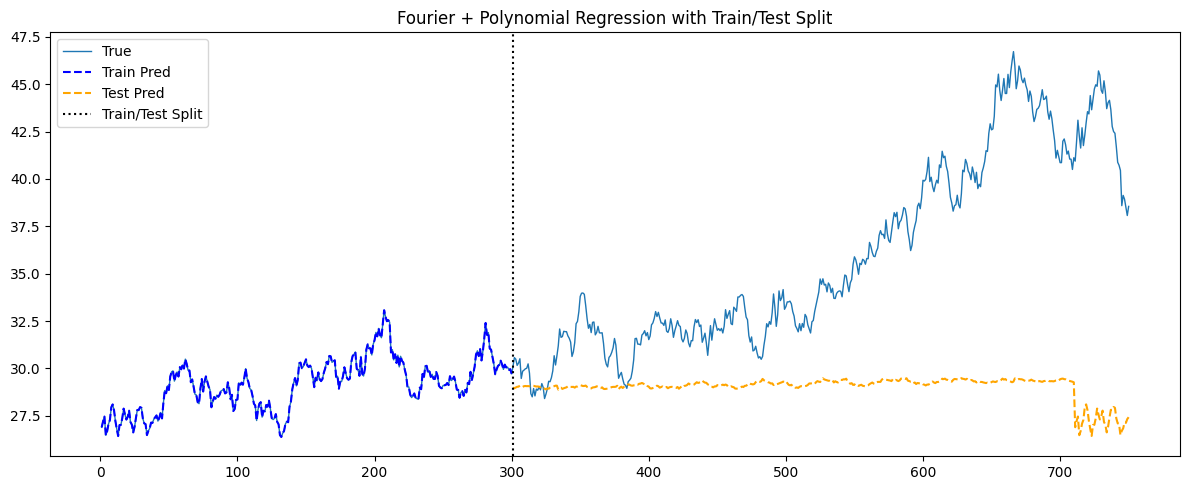

In [3]:
# Load and select instrument
prices = loadPrices("../prices.txt")
focus_length = 750
instrument = prices[tInst][:focus_length]  # limit to 750 samples if larger

# Generate time variable and target
t = np.linspace(1, focus_length, focus_length)
y = instrument.to_numpy()

# Fourier + Polynomial Feature Generator
def make_fourier(t, T, K):
    features = [np.ones_like(t)]  # bias term
    # Fourier terms
    for k in range(1, K + 1):
        features.append(np.sin(2*np.pi*k*t/T))
        features.append(np.cos(2*np.pi*k*t/T))
    return np.column_stack(features)

# Params
T = period
K = terms

#Split data into train/test
window = (0,300)
t_train = t[window[0]:window[1]]
y_train = y[window[0]:window[1]]
X_train = make_fourier(t_train, T, K)

t_test = t[window[1]:]
y_test = y[window[1]:]
X_test = make_fourier(t_test, T, K)

# Fit on training data
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train MSE: {train_mse:.4f}, R²: {train_r2:.4f}")
print(f"Test MSE:  {test_mse:.4f}, R²: {test_r2:.4f}")

# Plot predictions
plt.figure(figsize=(12,5))
plt.plot(t, y, label='True', linewidth=1)
plt.plot(t_train, y_train_pred, label='Train Pred', linestyle='--', color='blue')
plt.plot(t_test, y_test_pred, label='Test Pred', linestyle='--', color='orange')
plt.axvline(t[window[1]], linestyle=':', color='black', label='Train/Test Split')
plt.title("Fourier + Polynomial Regression with Train/Test Split")
plt.legend()
plt.tight_layout()
plt.show()